In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load downloaded CSV file

raw_csv_data=pd.read_csv("malaysia_house_price_data_2025.csv")
df=raw_csv_data.copy()

# Scaler Function
scaler = StandardScaler()

# Standardise features
num_cols = ['Median_PSF', 'Transactions']
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


In [61]:
df_scaled[num_cols].head()

,Median_PSF,Transactions
0,-0.128666,14.987110
1,-0.035514,13.023878
2,-1.029131,10.238212
3,-0.573723,9.628018
4,-0.832478,8.885174


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Feature Separation ---
X = df.drop(columns='Median_Price')
y = df['Median_Price']

# --- Convert categorical columns to numerical using one-hot encoding ---
X = pd.get_dummies(X, drop_first=True)

# --- Clean column names for XGBoost ---
X.columns = X.columns.astype(str)
X.columns = X.columns.str.replace('[\[\]<>]', '_', regex=True)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Train XGBoost on original y ---
xgb_model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    random_state=42,
    verbosity=1
)
xgb_model.fit(X_train, y_train)

# --- Predict on test set ---
y_pred = xgb_model.predict(X_test)

# --- Metrics in original units ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("=== Metrics ===")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


=== Metrics ===
MAE: 119546.16
MSE: 57936011154.89
RMSE: 240699.01
R²: 0.6369
MAPE: 23.91%


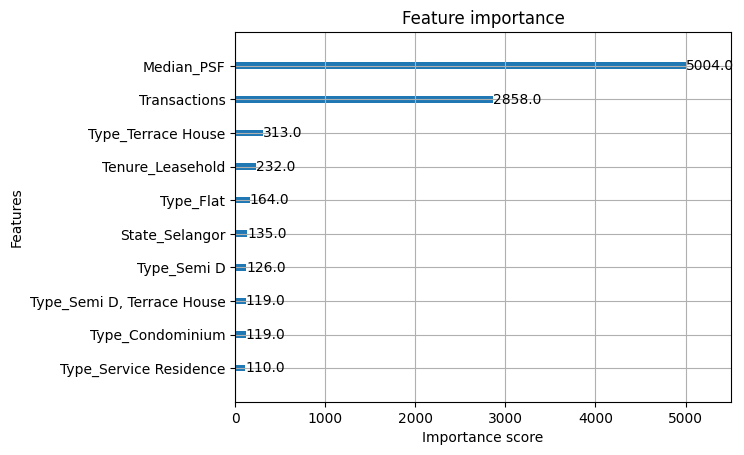

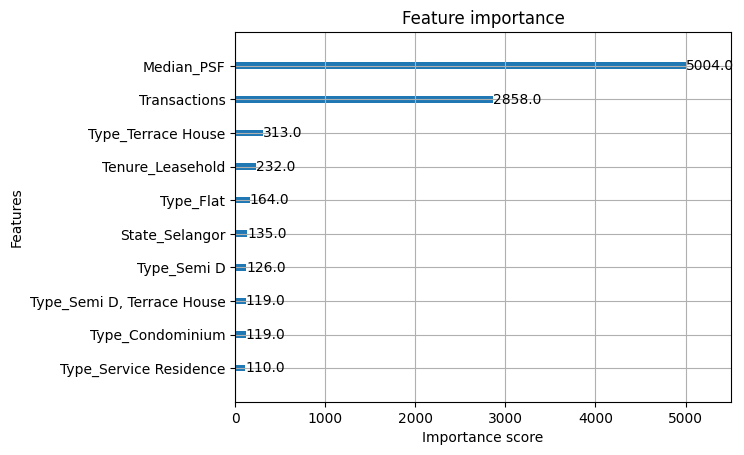

In [73]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.show()
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.show()


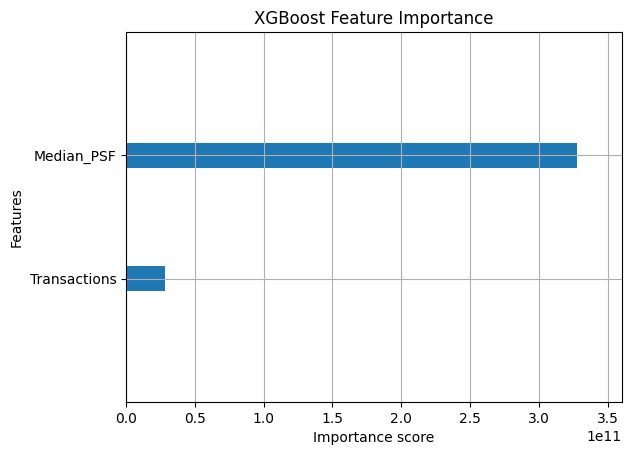

In [38]:
import xgboost as xgb

xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance")
plt.show()


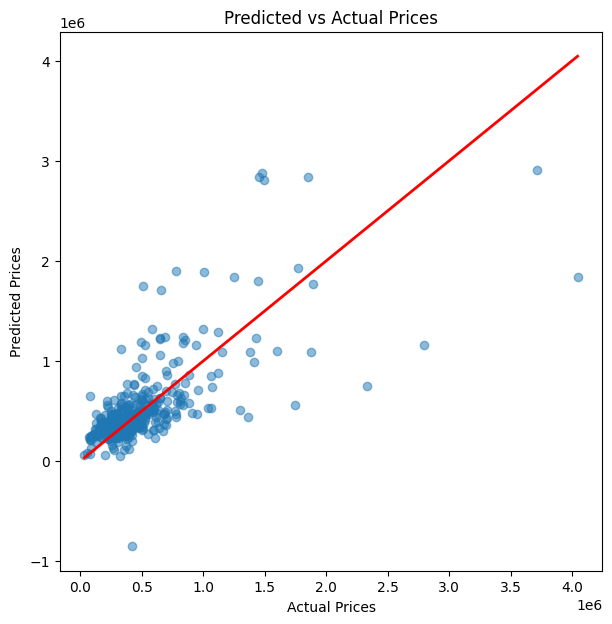

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()
